# Titanic dataset - The basic - EDA -Modelling 

In [62]:
#BASE PACKAGES
import re
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#PREPROCESSING PACKAGES

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#MODELLING PACKAGES

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from pyensembler import ensembler

#VALIDATION PACKAGES
from sklearn.model_selection import cross_val_score

#EVALUATION METRIC PACKAGES
from sklearn.metrics import mean_squared_error
import jupyterthemes as jupyter

In [63]:
train = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Kaggle\Titanic\train.csv')
test = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Kaggle\Titanic\test.csv')

In [45]:
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [46]:
train.Survived.value_counts()/len(train.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [47]:
train.groupby(['SibSp','Survived'], as_index = False).count()

,SibSp,Survived,PassengerId,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,398,398,398,398,296,398,398,398,49,398
1,0,1,210,210,210,210,175,210,210,210,77,208
2,1,0,97,97,97,97,86,97,97,97,17,97
3,1,1,112,112,112,112,97,112,112,112,52,112
4,2,0,15,15,15,15,14,15,15,15,1,15
5,2,1,13,13,13,13,11,13,13,13,5,13
6,3,0,12,12,12,12,8,12,12,12,1,12
7,3,1,4,4,4,4,4,4,4,4,2,4
8,4,0,15,15,15,15,15,15,15,15,0,15
9,4,1,3,3,3,3,3,3,3,3,0,3


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
aa = re.search(r'\bMr.|Mrs.\b', train.Name[1])

In [60]:
aa

IndexError: no such group

In [ ]:
train['Salu'] = train.Name.apply(lambda x: re.findall(r'\bMr.|Mrs.\b', x))

In [ ]:
train.Salu = train.Salu.str.replace('[', '')

In [ ]:
train.head()

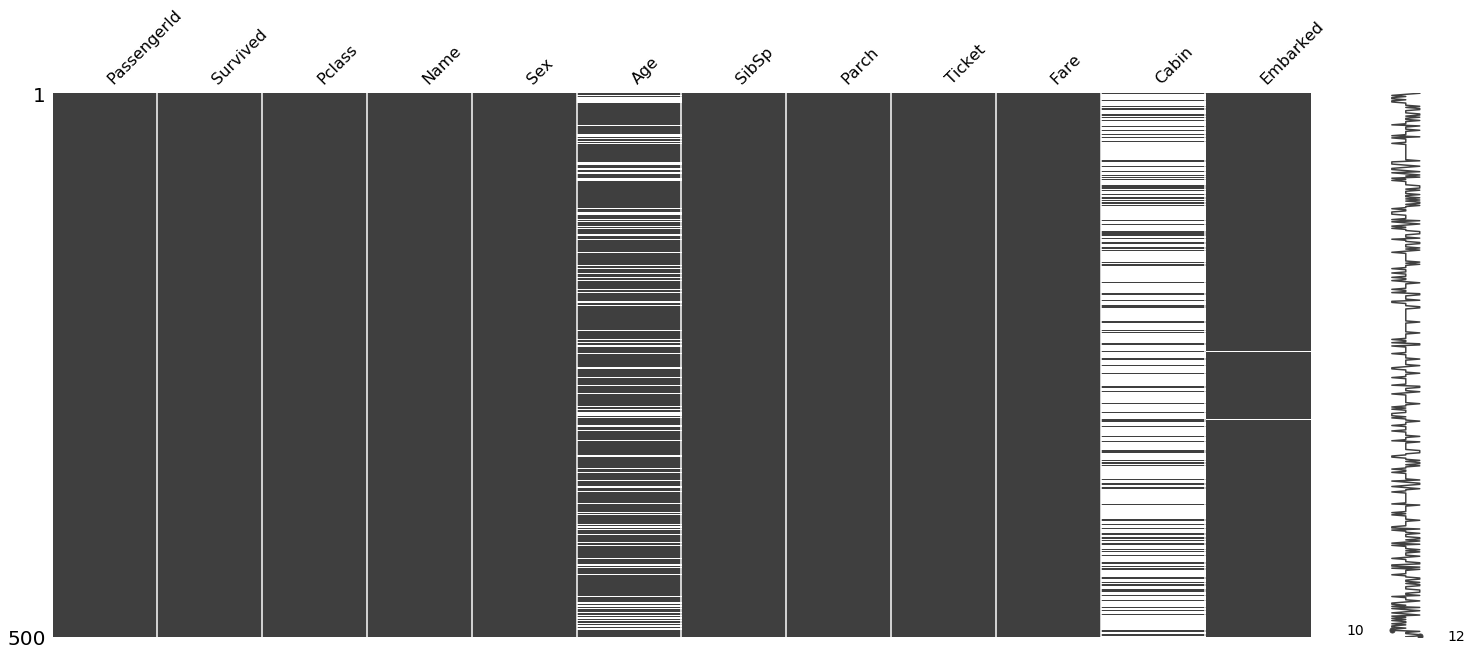

In [22]:
msno.matrix(train.sample(500))

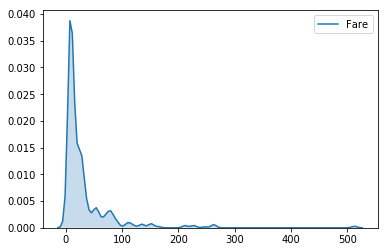

In [41]:
sns.kdeplot(train.Fare, shade =True)
plt.show()

In [25]:
pd.crosstab(train[''])

714

In [64]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
train.groupby(['Embarked', 'Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Survived                                                              
C        0                  75      75    75   75   51     75     75      75   
         1                  93      93    93   93   79     93     93      93   
Q        0                  47      47    47   47   20     47     47      47   
         1                  30      30    30   30    8     30     30      30   
S        0                 427     427   427  427  353    427    427     427   
         1                 217     217   217  217  201    217    217     217   

                   Fare  Cabin  
Embarked Survived               
C        0           75     17  
         1           93     52  
Q        0           47      2  
         1           30      2  
S        0          427     49  
         1          217     80

In [70]:
aa = pd.crosstab(index = train['Embarked'], columns = train['Survived'])

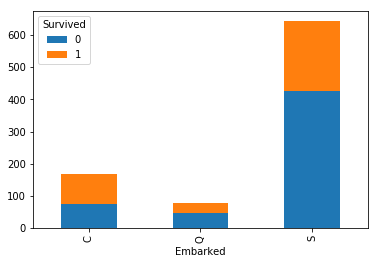

In [72]:
aa.plot(kind = 'bar', stacked =True)